##### Dataset

In [12]:
# Name: SMSSpamCollection
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [14]:
import pandas as pd
import seaborn as sns

##### Read the data

In [18]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])

In [19]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


##### Separate the input and output data

In [21]:
# input data
x = df['text']
y = df['label']

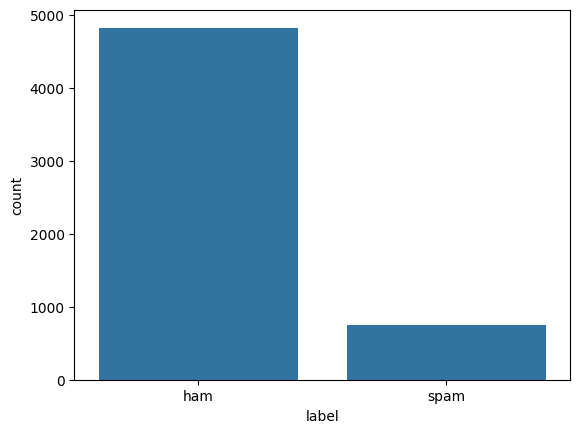

In [22]:
sns.countplot(x = y);

In [24]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Data Preparation

##### Data Cleaning

In [33]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [34]:
swords = stopwords.words('english')

In [35]:
# define a function for text cleaning
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    return tokens3

In [36]:
new_sent = 'It was the expected result. They told the same on fields.'

In [37]:
clean_text(new_sent)

['expected', 'result', 'told', 'fields']

##### TF*IDF Vectorization

In [39]:
# import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [43]:
# perform the operation
x_new = tfidf.fit_transform(x)

In [44]:
x_new.shape

(5572, 7217)

In [45]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [46]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

##### Encoding of output variable

In [49]:
# import the class
from sklearn.preprocessing import LabelEncoder

In [50]:
# create the object
le = LabelEncoder()

In [51]:
# apply the encoding
y_new = le.fit_transform(y)

In [52]:
y_new

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [57]:
le.inverse_transform([1])

array(['spam'], dtype=object)